# Ensemble learning 
when two machine learning is put together to produce a large machine learning algothrim is called Ensemble learning

# Random Forest steps
step1= pick at random k data points from the traning set
step2=build the decision tree associated to these k data points
step3=choose the number Ntree of trees you want to build and repeat Stpe1 & 2
step4=for new data point,make each of your tree Ntree trees predict the category to which the data point belongs,
and assign the new data point to the category that win the majority vote

![title](randomForest2.png)

In [3]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
dataset=pd.read_csv("./Position_Salaries.csv")
features=dataset.iloc[:,1:2].values
label=dataset.iloc[:,2].values

In [39]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=300,random_state=0)
model.fit(features,label)

RandomForestRegressor(n_estimators=300, random_state=0)

In [40]:
pred=6.5 
pred=np.array(pred)
pred=pred.reshape(1,1)
y_pred=model.predict(pred)
# pred.shape
y_pred

array([160333.33333333])

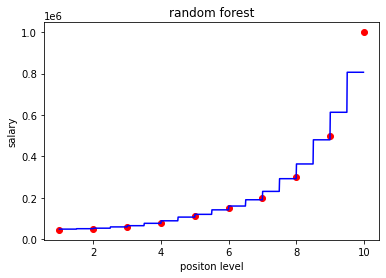

In [41]:
X_grid=np.arange(min(features),max(features),0.01)
X_grid=X_grid.reshape(len(X_grid),1)
plt.scatter(features,label,color='red')
plt.plot(X_grid,model.predict(X_grid),color="blue")
plt.title("random forest")
plt.xlabel("positon level")
plt.ylabel("salary")
plt.show()

In [37]:
conf=model.score(features,label)

In [42]:
# let check it over real time dataset

In [108]:
dataset=pd.read_csv("./Housing.csv")
features=pd.get_dummies(dataset.drop("price",axis=1))
label=dataset.price

In [111]:
# features=dataset.drop("Price",axis=1)
# learning how to drop multiple values


In [114]:
# print(pd.DataFrame(features))
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# features=sc.fit_transform(features)
# label=np.array(label)
# label=label.reshape(len(label),1)
# label=sc.fit_transform(label)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,label,test_size=0.3)

In [192]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

In [199]:
y_pred=model.predict(X_test)
y_pred=pd.DataFrame(y_pred)
socre=model.score(X_train,y_train)

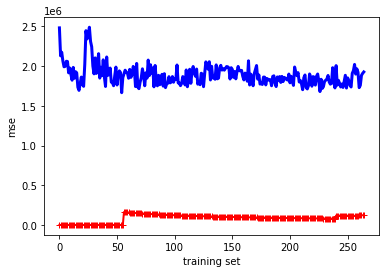

In [203]:
def learning_plot(model,X,y):
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3)
    train_errors,val_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_prdict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_prdict))
    plt.xlabel("training set")
    plt.ylabel("mse")
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
learning_plot(model,X_train,y_train)

In [208]:

from sklearn.metrics import mean_squared_error ,accuracy_score
error=mean_squared_error(y_test,y_pred)
error


1788604589603.6584

In [209]:

# X_train=np.array(X_train)
# y_train=np.array(y_train)
# X_train[:,0].reshape(-1,1)

In [211]:
train_yhat=model.predict(X_train)
train_acc = accuracy_score(y_train, train_yhat)

In [212]:
train_acc

0.6929133858267716

In [213]:
test_yhat = model.predict(X_test)
test_acc = accuracy_score(y_test, test_yhat)

In [214]:
test_acc

0.018292682926829267

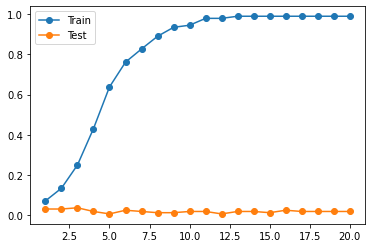

In [221]:
values = [i for i in range(1, 21)]
train_scores, test_scores = list(), list()
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = RandomForestClassifier(max_depth=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
	# evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
	# evaluate on the test dataset
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)
	# summarize progress
# 	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()

In [222]:
# RandomForest

# Random Forest,
it can be referred to as a ‘Forest’ of trees and hence the name “Random Forest”. The term ‘Random’ is due to the fact that this algorithm is a forest of ‘Randomly created Decision Trees’.


Regression: Prediction is the average prediction across the decision trees.
Classification: Prediction is the majority vote class label predicted across the decision trees.

# why to use Random Forest
The Decision Tree algorithm has a major disadvantage in that it causes over-fitting. This problem can be limited by implementing the Random Forest Regression in place of the Decision Tree Regression. Additionally, the Random Forest algorithm is also very fast and robust than other regression models.

![title](randomForest.jfif)

In [269]:
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')
X = dataset['Temperature'].values
y = dataset['Revenue'].values
dataset.head(5)


,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [270]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [271]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))

<ipython-input-271-cade36db796f>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train.reshape(-1,1), y_train.reshape(-1,1))


RandomForestRegressor(n_estimators=10, random_state=0)

In [272]:
y_pred = regressor.predict(X_test.reshape(-1,1))

In [274]:
df = pd.DataFrame({'Real Values':y_test.reshape(-1), 'Predicted Values':y_pred.reshape(-1)})

In [275]:
df

,Real Values,Predicted Values
0,376.554472,394.749093
1,656.636523,642.757232
2,212.591740,241.953905
3,441.508733,480.139363
4,916.648613,880.880544
5,410.860905,454.411862
6,623.248701,623.067690
7,450.473207,446.530297
8,483.333078,501.252576
9,32.546619,75.864106


In [310]:
acc=regressor.score(X_train.reshape(-1,1),y_train.reshape(-1,1))
test=regressor.score(X_test.reshape(-1,1),y_test)
# test
acc

0.9870173802544457

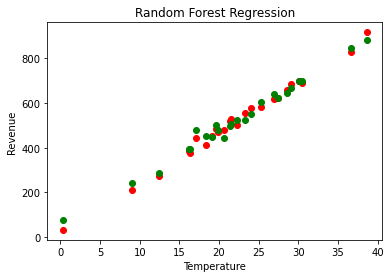

In [312]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

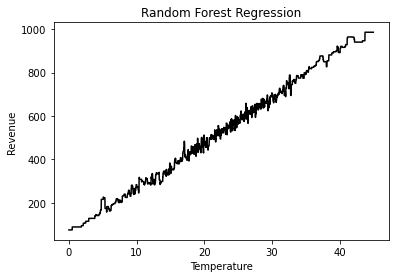

In [280]:
plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

In [303]:
train_yhat=regressor.predict(X_train.reshape(-1,1))
test_yhat=regressor.predict(X_test.reshape(-1,1))


In [302]:
# train_acc = score(y_train, train_yhat)
# test_acc=score(y_test,test_yhat)

<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed 

<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed 

<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed 

<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed 

<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed 

<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed 

<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed 

<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed 

<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train[:m],y_train[:m])
<ipython-input-305-a7d852f7c711>:5: DataConversionWarning: A column-vector y was passed 

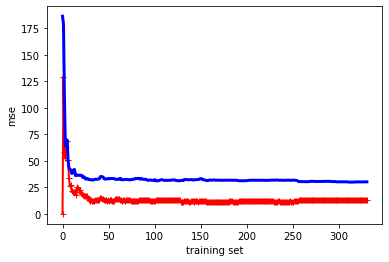

In [305]:
def learning_plot(model,X,y):
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.3)
    train_errors,val_errors=[],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict=model.predict(X_train[:m])
        y_val_prdict=model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_prdict))
    plt.xlabel("training set")
    plt.ylabel("mse")
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
learning_plot(regressor,X_train.reshape(-1,1),y_train.reshape(-1,1))